# Wizualizacja danych laboratorium 3
   Paweł Pęczek   
   Jakub Sroka


importy !

In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from IPython.display import Math
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from typing import Tuple
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, LocallyLinearEmbedding, Isomap

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\milek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\milek\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Narzędzia Pythona do analizy tekstu 

"Fancy token-level analysis such as stemming, lemmatizing, compound splitting, filtering based on part-of-speech, etc. are not included in the scikit-learn codebase, but can be added by customizing either the tokenizer or the analyzer. Here’s a CountVectorizer with a tokenizer and lemmatizer using NLTK"
~ https://scikit-learn.org/stable/modules/feature_extraction.html

### 1. Stop Words

"Stop Words: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query."   
~ https://www.geeksforgeeks.org/

![](image1.png)

Jak sprawdzić co jest "stop word" a co nie? 

In [4]:
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

Jak więc odfiltrować stop word z zdania?

In [5]:
example_sent = "This is a sample sentence, showing off the stop words filtration and how easy it is."
stop_words = set(stopwords.words('english'))  
word_tokens = word_tokenize(example_sent) 
  
filtered_sentence = [word for word in word_tokens if not word in stop_words] 
  
print(word_tokens) 
print(filtered_sentence)

['This', 'is', 'a', 'sample', 'sentence', ',', 'showing', 'off', 'the', 'stop', 'words', 'filtration', 'and', 'how', 'easy', 'it', 'is', '.']
['This', 'sample', 'sentence', ',', 'showing', 'stop', 'words', 'filtration', 'easy', '.']


### 2. Stemming

Czym tak naprawdę jest stemming?    

rozważmy dwa następujące zdania:   

I was taking a ride in the car.   
I was riding in the car.   

Czy te zdania się od siebie różnią? jak? czy znaczenie pozostaje to samo? czy chcemy mieć osobne tokenny dla ride i riding?


![](image2.png)

In [6]:
ps = PorterStemmer()

text = "Pythonly python pythoned his way to the next python wich was pythoning on python's pavement"

words = word_tokenize(text)

s = set()

for w in words:
    s.add(ps.stem(w))
    print(w, ps.stem(w))
        
print(s)

Pythonly pythonli
python python
pythoned python
his hi
way way
to to
the the
next next
python python
wich wich
was wa
pythoning python
on on
python python
's 's
pavement pavement
{'hi', 'wich', 'to', 'wa', 'python', 'pavement', 'next', 'the', 'pythonli', 'on', 'way', "'s"}


### 3. BoW - Bag of Words

BoW - jest metodą do wyciągania cech z dokumentów tekstowych. Te cechy mogą służyć do uczenia modeli machine learningowych. Metoda tworzy gramatykę unikalnych słów na postawie podanego zbioru danych oraz odwzrowanie wektorowe dla każdego dokumentu.

### <strong>"In simple terms, it’s a collection of words to represent a sentence with word count and mostly disregarding the order in which they appear."</strong>   
~ https://medium.freecodecamp.org/an-introduction-to-bag-of-words-and-how-to-code-it-in-python-for-nlp-282e87a9da04

![](image3.png)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
'All my dogs are funny creatures',
'When my dog sits down, she looks like a frog!',
'Dogs are space invaders',
'If dogs were cats they would be lazy',
'Dogs love going for a walk, they are not as lazy as I am.'
]

vectorizer = CountVectorizer()
print( vectorizer.fit_transform(corpus).todense() )
print( vectorizer.vocabulary_ )

[[1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1]
 [0 1 1 2 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0]]
{'all': 0, 'my': 20, 'dogs': 8, 'are': 2, 'funny': 12, 'creatures': 6, 'when': 28, 'dog': 7, 'sits': 23, 'down': 9, 'she': 22, 'looks': 18, 'like': 17, 'frog': 11, 'space': 24, 'invaders': 15, 'if': 14, 'were': 27, 'cats': 5, 'they': 25, 'would': 29, 'be': 4, 'lazy': 16, 'love': 19, 'going': 13, 'for': 10, 'walk': 26, 'not': 21, 'as': 3, 'am': 1}


In [8]:
matrix = vectorizer.fit_transform(newsgroups_train.data)
print(newsgroups_train.data[0])
print(len(newsgroups_train.data))
print(matrix.shape)
print(len(vectorizer.vocabulary_))

From: psyrobtw@ubvmsd.cc.buffalo.edu (Robert Weiss)
Subject: 18 Apr 93   God's Promise in Philippians 4:9
Organization: University at Buffalo
Lines: 8
News-Software: VAX/VMS VNEWS 1.41
Nntp-Posting-Host: ubvmsd.cc.buffalo.edu


	Those things,
	which ye have both learned, and received,
	and heard, and seen in me,
	do:
	and the God of peace shall be with you.

	Philippians 4:9

1441
(1441, 26488)
26488


### 4. tf-idf (TF – term frequency, IDF – inverse document frequency)

* Jedna z metod obliczania wagi słów w oparciu o liczbę ich wystąpień.
* Należy do grupy algorytmów obliczających statystyczne wagi termów.
* Każdy dokument reprezentowany jest przez wektor, składający się z wag słów występujących w tym dokumencie.
* TFIDF informuje o częstości wystąpienia termów uwzględniając jednocześnie odpowiednie wyważenie znaczenia lokalnego termu i jego znaczenia w kontekście pełnej kolekcji dokumentów.

https://pl.wikipedia.org/wiki/TFIDF

#### Do czego używamy?

* Stosowany jako metoda oceny relewantności dokumentu w wyszukiwarkach internetowych.
* Ocena podobieństwa dokumentów w systemach grupowania wyników oraz systemach typu antyplagiat.

![](TF.png)
![](IDF.png)
![](tfidf.png)

In [9]:
data = [
     'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?',
]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data)
print(X)
print(vectorizer.get_feature_names())
print(vectorizer.get_stop_words())

  (0, 8)	0.38408524091481483
  (0, 3)	0.38408524091481483
  (0, 6)	0.38408524091481483
  (0, 2)	0.5802858236844359
  (0, 1)	0.46979138557992045
  (1, 8)	0.281088674033753
  (1, 3)	0.281088674033753
  (1, 6)	0.281088674033753
  (1, 1)	0.6876235979836938
  (1, 5)	0.5386476208856763
  (2, 8)	0.267103787642168
  (2, 3)	0.267103787642168
  (2, 6)	0.267103787642168
  (2, 0)	0.511848512707169
  (2, 7)	0.511848512707169
  (2, 4)	0.511848512707169
  (3, 8)	0.38408524091481483
  (3, 3)	0.38408524091481483
  (3, 6)	0.38408524091481483
  (3, 2)	0.5802858236844359
  (3, 1)	0.46979138557992045
['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
None


In [11]:
X = vectorizer.fit_transform(newsgroups_train.data)
print(X)
print(len(vectorizer.get_feature_names()))

  (0, 11071)	0.02879840104494835
  (0, 19516)	0.15199951710440102
  (0, 24556)	0.36446543134314724
  (0, 5981)	0.19530985710363322
  (0, 5449)	0.4402468433781281
  (0, 9356)	0.07931609459002179
  (0, 20832)	0.09765492855181661
  (0, 25756)	0.14335698469558542
  (0, 22964)	0.02879840104494835
  (0, 659)	0.1117187074136126
  (0, 3908)	0.10536372502673987
  (0, 2410)	0.1139350623410876
  (0, 11536)	0.14394793055637914
  (0, 19352)	0.13428315435278762
  (0, 13019)	0.0658727603138373
  (0, 18445)	0.43662057210512645
  (0, 17678)	0.030043159068796572
  (0, 24833)	0.05655625940428655
  (0, 4196)	0.05527611971861686
  (0, 14979)	0.02879840104494835
  (0, 16966)	0.09494984233334938
  (0, 22254)	0.09876697408890936
  (0, 25208)	0.13937847584351945
  (0, 25473)	0.13203798661546048
  (0, 25476)	0.1444438457964033
  :	:
  (1440, 25498)	0.0718200387356931
  (1440, 19695)	0.08664811108750727
  (1440, 12722)	0.08154715620433525
  (1440, 3985)	0.10644954735291419
  (1440, 26432)	0.07512071307053197
  (

# t-SNE T-distributed Stochastic Neighbor Embedding (t-SNE)

Algorytm machine-learningowy do wizualizacji danych stworzony przez Geoffrey'a Hinton i Laurens'a van der Maaten. Jest to nieliniowa technika do redukcji wymiarów, dla średnich wielkości zbiorów danych.

t-SNE w 10 min ~~https://www.youtube.com/watch?v=NEaUSP4YerM~~ -> https://lvdmaaten.github.io/publications/papers/JMLR_2008.pdf

tak byśmy nie chcieli redukować   
![](t1.png)

odrazu lepiej!   
![](t2.png)

zaczynamy z losowym rozkładem danych na przestrzeni 1 wymiarowej
![](t3.png)

# Stochastic Neighbor Embedding

Przenosimy rozważania na grunt probabilistyki.

Dla punktów $x_i$ oraz $x_j$ podobieństwo oznaczmamy jako prawdopodobieństwo warunkowe $p_{i|j}$ (intuicyjnie $x_i$ wybiera jako swojego sąsiada $x_j$ - jeśli sąsiedzi są wybierani według rozkładu Gaussa z centrum w punkcie wybierającym)

![](w1.png)

Mały hint z kursu statystyki:
$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

Analogicznie postąpic można dla punktów po zmapowaniu ($y_i$ oraz $y_j$). Jeśli ustalić wariancję na $\frac{1}{\sqrt{2}}$, to otrzymujemy:

![](probab_mapped.png)

Zadajmy następujące pytanie: __Jaką własność posiadałoby idealne przekształcenie redukujące wymiarowość danych?__

Odpowiedź jest dość prosta: $p_{i|j}$ powinien być równy $q_{i|j}$. Do tego dąży klasyczne SNE (jak i t-SNE - tylko lepiej :) )

__Czy umiemy zmierzyć podobieństwo rozkładów prawdopodobieństwa?__

Owszem: __Dywergencja Kullbacka-Leiblera__

Dla rozkładów dyskretnych:

$d_{KL}(p, q) = \sum_{i}p(i)log_2\frac{p(i)}{q(i)}$

Dla rozkładów ciągłych:

$d_{KL}(p, q) = \int_{-\infty}^{\infty}p(x)log_2\frac{p(x)}{q(x)}dx$

Intuicja:

Rozkład p waży "różnicę" między p i q wyrażoną jako logarytm ilorazu wartości gęstości p i q, a co za tym idzie:
* jeśli p = q to $log_2\frac{p(i)}{q(i)}$  = 0
* w innym przypadku osiąga wartość nieujemną (dowód: https://stats.stackexchange.com/questions/335197/why-kl-divergence-is-non-negative) dającą się interpretować jako wartość stanowiącą miarę tego, jak różne są rozkłady prawdopodobieństwa - ma to związek z teorią informacji i mierzeniem entropii (https://pl.wikipedia.org/wiki/Entropia_(teoria_informacji)) - zainteresowanych odsyłamy tutaj: https://www.countbayesie.com/blog/2017/5/9/kullback-leibler-divergence-explained

__Dla dociekliwych__

* Tak, da się uogólnić na więcej wymiarów
* Tak, to nie jest prawdziwa metryka (brak symetrii i spełnienia warunklu trójkąta) - świat nie zawsze musi być idealny

__Dla wszystkich (sami wybraliście ten przedmiot)__

Skoro każdy punkt posiada warunkowe rozkłady dla każdego innego potencjalnego sąsiada - do zastosowania powyższej 
wiedzy w praktyce będzie potrzebny sprytny sposób.

Zdefinujmy naszą miarę "odpowiedniości" w następujący sposób:

$$L = \sum_{i}KL(P_i || Q_i) = \sum_{i}\sum_{j}p_{j|i}log_2\frac{p_{j|i}}{q_{j|i}}$$

Zauważmy, że L może być traktowana jako funkcja __celu__. Skoro umiemy (MOWNiT bardzo) przeprowadzać optymalizację
numerycznie - do dzieła.

![](sgd_meme.png)

__Zauważmy__

Z racji braku symetrii dywergencji KL - nasza funkcja celu zakłada duże kary za użycie $p_{i|j} >> q_{i|j}$ i mniejsze w drugą stronę, co znaczy, że nacisk jest kładziony na __lokalną strukturę__. 

__Co z wariancją?__

Jak do tej pory nie mówiliśmy nic o wyborze wartości $\sigma_i$, które de facto indukują $P_i$. SNE dokonuje wyszukiwania binarnego wartości wariancji z zastosowaniem __zdefiniowanego parametru - perplexity__, który jest interpretowany jako miara ilości sąsiadów, których się spodziewamy dla egzemplarza ze zbioru danych - zwykle wartość ustawiana między 5 a 50, chociaż w szczególnych przypadkach wartość może być kluczowym aspektem warunkującym powodzenie wizualizacji: https://distill.pub/2016/misread-tsne/

__To, czego zwykle nie widać__

Okazuje się, że licznie gradientu tak zdefiniowanej funkcji celu jest banalne:

$$\frac{\partial{C}}{\partial{y_i}} = 2\sum_{j}(p_{j|i} - q_{j|i} + p_{i|j} - q_{i|j})(y_i - y_j)$$

Aby ułatwić optymalizację zwykle dodaje się dość dużą wartość momentum. Istotę objasnia: https://pl.wikipedia.org/wiki/%C5%9Arednia_ruchoma oraz:

$$V_t = \beta V_{t - 1} + \alpha \nabla L$$

We wczesnych stadiach optymalizacji szum z rozkładu normalnego Gaussa dodawany jest do punktów wynikowego mapowania po każdej iteracji, a łagodzenie wariancji wraz z postępem optymalizacji można porównać do symulowanego wyżarzania -- pozwala ono uniknąć płytkich lokalnych minimów.

## SNE, SNE, SNE... a co z t-SNE, które powinniśmy omawiać?

Jak dotąd głównie skupialiśmy się na omówieniu metody zaprezentowanej duetu Hinton, Roweis z 2002r. Głównym problemem jest jednak __trudność w optymalizacji__ opisana w publikacji dotyczącej t-SNE jako "crowding problem".

Główne różnice:
* użycie funkcji kosztu uwzględniającej symetrię
* użycie rozkładu t-Studenta

### Symetryczne SNE

Wcześniej:

$$L = \sum_{i}KL(P_i || Q_i) = \sum_{i}\sum_{j}p_{j|i}log_2\frac{p_{j|i}}{q_{j|i}}$$

Teraz:

$$L = KL(P || Q) = \sum_{i}\sum_{j}p_{ij}log_2\frac{p_{ij}}{q_{ij}}$$

Co się zmieniło? __Użyliśmy wspólnego rozkład prawdopodobieństwa__.

Intuicyjnie: Wcześniej pówiliśmy o prawdopodobieństwie __warunkowym__ wyboru $x_j$ jako sąsiada $x_i$, a teraz zastanawiamy się nad prawdopodobieństwem tego, że $x_i$ i $x_j$ są sąsiadami. Zmiana wydaje się marginalna, ale uzyskujemy następująca własność: $p_{ij}  = p_{ji}$, a także $q_{ij}  = q_{ji}$

Natruralnym przedstawieniem podobieństw punktów byłoby teraz:

![](t_sne_pairwaise_sim.png)

__Jednak:__

Wyobraźmy sobie także outliner'a ze zbioru danych. Dla takiego punktu wartości $\lvert x_i - x_j \lvert ^2$ będą duże dla każdego $x_j$. Dla takiego outliner'a $p_{ij}$ są małe dla każdego $j$ - a co za tym idzie pozycja w wynikowym mapowaniu jest słabo określona.

W publikacji zaproponowano więc obejście tego problemu przez zdefiniowanie $p_{ij}=\frac{p_{j|i}+p_{i|j}}{2n}$, co zapewnia następującą własność: $\sum_j p_{ij} > \frac{1}{2n}$ dla każdego $x_i$ - a zatem __każdy punkt ma znaczący udział w kształtowaniu funkcji kosztu__.

Gradient symetrycznego SNE wygląda następująco:
$$\frac{\partial{C}}{\partial{y_i}} = 4\sum_{j}(p_{ij} - q_{ij})(y_i - y_j)$$

__Experymentalnie potwierdzono, że symetryczna wersja SNE jest co najmniej tak samo dobra jak asymetryczna.__

### Crowding

Rozważmy "kulę" w przestrzeniach odpowiednio dwu- i trój- wymiarowych.
$$S = \pi r^2$$
$$V = \frac{4}{3}\pi r^3$$
itd...

Okazuje się, że objętość "kuli" zaczepionej w pewnym punkcie przestrzeni d-wymiarowej jest proporcjonalna do $r^d$.

Wyobraźmy sobie dane rozmieszczone jednostajnie wokół pewnego punktu w przestrzeni wielowymiarowej, a następnie pewne mapowanie o sensownych własnościach powodujące redukcję wymiarowości. Intuicyjnie - punkt będące blisko środka powinny zachować tą własność po przekształceniu, a jednocześnie __objętość, w której mogą zostać one umieszczone wydatnie się zmniejsza__. Takie zjawisko nosi nazwę "crowding problem".

### Probability strikes back

![](t-student.gif)

![](gaussian_vs_t_student.jpg)

__Ciężkie ogony na ratunek__

To co rzuca się w oczy patrząc na funkcję gęstości prawdopodobieństwa rozkłady t-Studenta to ciężkie ogony. Zastanówmy się w czym mogłyby one pomóc.

Jak pamiętamy dotychczas staraliśmy się odpowiednio dopasować raczej wspólny rozkład prawdopodobieństwa, aniżeli explicite dystans punktów. Zastanówmy się jednak nad konwersją dystansów na prawdopodobieństwo. Wiemy, że małe dystanse między punktami w przestrzeni wielowymiarowej będą się wydatnie zmniejszać przez przekształcenie redukujące wymiarowość. Używając w przestrzeni o zredukowanej wymiarowości rozkładu o cięższych ogonach niż w przestrzeni o większej liczbie wymiarów damy sobie szansę na znalezienie mapowania, które przeciwdziała crowding'owi.

Tak więc t-SNE proponuje następujące sformułowanie wspólnego rozkładu prawdopodobieństwa w przestrzeni o zredukowanej wymiarowości:

![](t_sne_q_joint_prob.png)

Wykorzystujemy rozkład t-Studenta z 1 stopniem swobody. $(1 + |y_i - y_j|^2)^{-1}$ odpowiada "inverse-squared law" (https://en.wikipedia.org/wiki/Inverse-square_law) - wielkość jest odwrotnie proporcjonalna do kwadratu odległości od umownego źródła (nazewnictwo ze względu na silne konotacje z fizyką). taka własność powoduje m. in. łatwiejszą optymalizację.

Decydując się na tą zmianę, zmienia się również formuła na obliczanie gradientu:

$$\frac{\partial{C}}{\partial{y_i}} = 4\sum_{j}(p_{ij} - q_{ij})(y_i - y_j)(1 + |y_i - y_j|^2)^{-1}$$

![](gradient_visualisation.png)

# Algorytm t-SNE

![](t_sne_algo.png)

#### Wykaz wzorów

![](eq_1.png)
![](perp.png)
![](eq4.png)
![](eq6.png)

## Problemy

Jak zwykle - złożoność obliczeniowa - kwadratowa względem ilości danych. Liczymy macierze podobieństwa o wymiarach $N \times N$ zarówno dla oryginalnych danych, jak i danych w zredukowanej przestrzeni.

## bh-SNE comes to the rescue

bh-SNE w 10 minut: https://arxiv.org/pdf/1301.3342.pdf

Marchewka: 

czas $O(NlgN)$, pamięć $O(N)$

Kij:

bh-SNE używa drzew metryk do przybliżenia rozkładu P z tylko $O(uN)$ niezerowymi wartościami, a do przybliżenia gradientu używa algorytmu Bearnes'a-Huta'a ($u$ - perplexity)

__Obserwacja:__

Z racji użycia rozkładu Gaussa prawdopodobieństwa $p_{ij}$ odpowiadające punktom znikomo ze sobo powiązanym są bardzo bliskie zeru. W skutek czego macierz P będzie dość rzadka, jeśli przybliżyć takie wartości do zera. Domyślamy się także, że zabieg ten będzie miał prawie nieobserwowaly wpływ na jakość mapowania.

$\mathcal{N}_i$ niech oznacza zbiór $3u$ (zaokrąglone w dół) najbliższych sąsiadów.

Wówczas:
![](bh_snee_p.png)

Zbiory najbliższych sąsiadów mogą być znalezione w czasie $O(uNlgN)$ dzięki drzewom Vantage-Point.

W takim drzewie wszystkie węzły zawierają przechowują egzemplarz zbioru danych i "kulę" o środku w tym egzemplarzu. Węzły posiadają dwa potomki. Prawy potomek reprezentuje egzemplarze danych zawarte w "kuli", natomiast lewy - poza nią.

__Jak konstruowane są drzewa VP?__

Iterujemy po zbiorze danych i dla każdego elementu przechodzimy po drzewie zgodnie z przynależnością do "kuli" danego węzła lub nie. Dochodząc do miejsca, gdzie powinniśy utworzyć liść - tworzymy węzeł dobierając promień nowej "kuli" jako medianę odległości między obiektem i wszystkimi obiektami znajdującymi się w "kuli" jego rodzica.

Wyszukiwanie najbliższych sąsiadów w takim drzewie odbywa się metodą depth-first search. Na bieżąco aktualizujemy listę najbliższych zaobserwowanych obiektów w węzłach - jeśli w lewym poddrzewie mogą znajdować się obiekty o odległości mniejszej niż aktualnie najbliższa - zostaje ono przeszukane. Kolejność przeszukiwania poddrzew wyznacza spełnienie warunku należności do "kuli" rodzica. 

Funkcja kosztu zdefiniowana w publikacji dotyczącej t-SNE nie jest wypukła, dlatego faktyczne implementacje stosują następującą formułę wyliczania gradientu:
![](t_sne_actual_grad.png)

Z członem normalizacyjnym:
![](t_sne_z_term.png)


Dla aproksymacji gradientu używamy następującej formuły:

![](bh-grad.png)

Obliczenie członu $F_{attr}$ z aproksymacji $P$ może być wykonane w czasie $O(uN)$, jednakże prosta implementacja obliczenia członu $F_{rep}$ wymaga $O(N^2)$. Tutaj objawia się algorytm Bearnes'a-Huta'a pozwalający osiągnąć $O(NlgN)$.

__Obserwacja:__

Jeśli punkty $y_i$, $y_j$ i $y_k$ spełniają zależność:

$$|y_i - y_j| \approx |y_i - y_k| >> |y_j - y_k|$$, 

to $y_j$ i $y_k$ wpływają w prawie taki sam sposób na wartość $F_{rep}$

__QuadTree__

QuadTree to drzewo, w którym każdy węzeł reprezentuje prostokątną komórkę z określonym punktem centralnym, szerokościa i wysokością. Węzły niebędące liśćmi mają do 4 potomków dzielących ich komórkę na mniejsze. Liście reprezentują węzłu z maksymalnie jednym punktem z docelowego mapowania. W każdym węźle prezchowujemy środek masy punktów, które znajdują się w poddrzewie przezeń wyznaczonym. Drzewo może być wyznaczone w czasie $O(N)$ przez przeglądanie zbioru danych element po elemencie.

__Obliczanie $F_{rep}$ - istota aproksymacji__

Jeśli komórka QuadTree jest bardzo mała lub doległa od punktu $y_i$, wówczas jej wpływ na wartość $F_{rep}$ można uznać za jednakowy dla wszystkich punktów w środku komórki.

## Porównanie tSNE i bhSNE

W publikacji na temat bhSNE podano następujące porównanie dla datasetu'u MNIST:

![](t_sne_vs_bh_sne.png)

## W pigułce
Wyznaczanie rozkładów prawdopodobieństwa

użyjemy do tego wartości p, która będzie oznaczać prawdopodobieństwo że badany element wybierze drugi element jako swojego sąsiada jeżeli, sąsiedzi wybierani byliby z pradopodobieństwem proporcjonalnym do gęstości krzywej gaussa z środkiem w badanym punkcie   

![](w1.png)
![](w2.png)
![](t4.png)

Czy widzicie problem jaki tworzą różne gęstości klastrów? Jaka powinna być wariancja w rozkładzie gaussa? 

![](t5.png)

"The bandwidth of the Gaussian kernels σ, is set in such a way that the perplexity of the conditional distribution equals a predefined perplexity using the bisection method. As a result, the bandwidth is adapted to the density of the data: smaller values of σ are used in denser parts of the data space."   
~ https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding

tworzymy macierz podobieństwa 

![](t6.png)

do stworzenia macierzy po lewej używamy rozkładu t-studenta! stąd t w t-SNE
![](t7.png)

# Praktyka

In [2]:
!wget https://pjreddie.com/media/files/mnist_test.csv

--2019-04-15 19:53:56--  https://pjreddie.com/media/files/mnist_test.csv
Załadowano certyfikat CA '/etc/ssl/certs/ca-certificates.crt'
Translacja pjreddie.com (pjreddie.com)... 128.208.3.39
Łączenie się z pjreddie.com (pjreddie.com)|128.208.3.39|:443... połączono.
Żądanie HTTP wysłano, oczekiwanie na odpowiedź... 200 OK
Długość: 18289443 (17M) [application/octet-stream]
Zapis do: `mnist_test.csv'

mnist_test.csv      100%[===================>]  17,44M  2,98MB/s     w 6,7s    

2019-04-15 19:54:04 (2,61 MB/s) - zapisano `mnist_test.csv' [18289443/18289443]



In [3]:
mnist = pd.read_csv('mnist_test.csv', header=None)

In [4]:
mnist.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
def print_random_sample(dataset: pd.DataFrame) -> None:
    example_idx = random.randint(0, dataset.shape[0] - 1)
    example = dataset.loc[example_idx, 1:]
    example = example.values
    example = example.reshape((28, 28))
    plt.imshow(example, cmap='gray')
    
def get_features_and_labels(dataset: pd.DataFrame) -> Tuple[np.ndarray, np.ndarray]:
    dataset = dataset.values
    return dataset[:, 1:], dataset[:, 0]

def draw(title: str, final_df: pd.DataFrame) -> None:
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel('Component 1', fontsize = 15)
    ax.set_ylabel('Component 2', fontsize = 15)
    ax.set_title(title, fontsize = 20)

    targets = [i for i in range(0, 10)]
    colors = ['C{}'.format(i) for i in range(0, 10)]
    for target, color in zip(targets, colors):
        indicesToKeep = final_df['target'] == target
        ax.scatter(final_df.loc[indicesToKeep, 'component 1'],
                   final_df.loc[indicesToKeep, 'component 2'],
                   c = color,
                   s = 100)
    ax.legend(targets)
    ax.grid()
    plt.show()
    
def knn(k: int, original_data: np.ndarray, transformed_data: np.ndarray) -> float:
    neig = NearestNeighbors(n_neighbors=k, algorithm='kd_tree')
    neig.fit(original_data)
    in_d = np.array([])
    out_d = np.array([])
    for i in range(original_data.shape[0]):
        in_d = np.append(in_d, neig.kneighbors([original_data[i]], return_distance=False))

    neig.fit(transformed_data)
    for i in range(transformed_data.shape[0]):
        out_d = np.append(out_d, neig.kneighbors([transformed_data[i]], return_distance=False))
    # bierzemy ilość pokrywających się odejmujemy to że się same ze sobą pokrywają i dzielimy przez rozmiar wszystkich
    return ((len(np.extract(in_d == out_d, out_d)) - original_data.shape[0]) / (len(out_d) - original_data.shape[0]))

def nn(data: np.ndarray, labels: np.ndarray, k: int = 10) -> float:
    neighbours = NearestNeighbors(n_neighbors=k+1, algorithm='ball_tree').fit(data)
    _, indices = neighbours.kneighbors(data) # indices[v] zawiera listę jego k+1 najbliższych sąsiadów, wśród nich jest również v
    acc = 0
    for index in range(data.shape[0]):
        same_class = 0
        for n in indices[index][1:]:
            if labels[index] == labels[n]:
                same_class += 1
        acc += same_class / k
    return acc / data.shape[0]

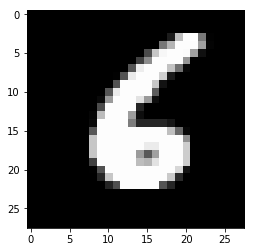

In [5]:
print_random_sample(mnist)

In [6]:
# Proszę nie uruchamiajcie komórek poniżej - obliczenia trwają dość długo!
X, y = get_features_and_labels(mnist) 
X_embedded = TSNE(n_components=2, verbose=2).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 1.163s...
[t-SNE] Computed neighbors for 10000 samples in 156.480s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 422.930236
[t-SNE] Computed conditional probabilities in 0.940s
[t-SNE] Iteration 50: error = 97.7860565, gradient norm = 0.0004130 (50 iterations in 5.772s)
[t-SNE

In [8]:
mnist_embedded = np.column_stack((X_embedded, y))
mnist_embedded = pd.DataFrame(data=mnist_embedded, columns=['component 1', 'component 2', 'target'])

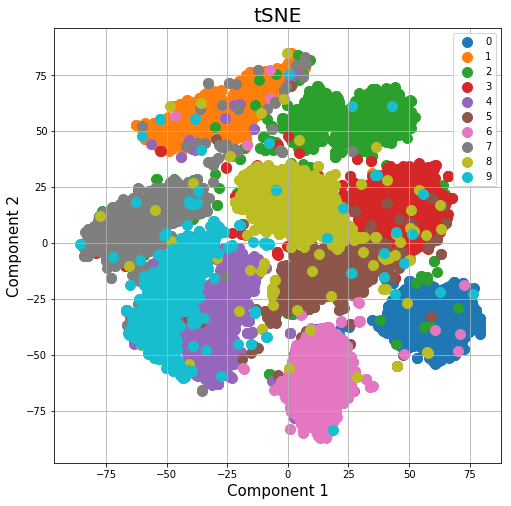

In [10]:
draw('tSNE', mnist_embedded)

In [17]:
knn_3 = knn(3, X, mnist_embedded.values)

In [18]:
print('MNIST tSNE knn_3: {}'.format(knn_3))

MNIST tSNE knn_3: 0.3515


In [21]:
orig_nn_3 = nn(X, y, 3)

In [22]:
print('MNIST original data nn_3: {}'.format(orig_nn_3))

MNIST original data nn_3: 0.9410333333333357


In [23]:
tsne_nn_3 = nn(mnist_embedded.values, y, 3)

In [24]:
print('MNIST tSNE data nn_3: {}'.format(tsne_nn_3))

MNIST tSNE data nn_3: 0.9661333333333342


In [25]:
# PCA
pca = PCA(n_components=2).fit_transform(X)

In [26]:
mnist_embedded_pca = np.column_stack((pca, y))
mnist_embedded_pca = pd.DataFrame(data=mnist_embedded_pca, columns=['component 1', 'component 2', 'target'])

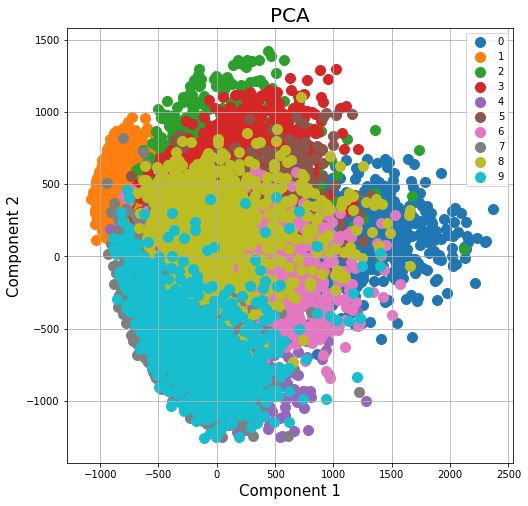

In [27]:
draw('PCA', mnist_embedded_pca)

In [28]:
pca_knn_3 = knn(3, X, mnist_embedded_pca.values)
pca_nn_3 = nn(mnist_embedded_pca.values, y, 3)
print('MNIST PCA knn_3: {}'.format(pca_knn_3))
print('MNIST PCA data nn_3: {}'.format(pca_nn_3))

MNIST PCA knn_3: 0.0046
MNIST PCA data nn_3: 0.3902666666666721


In [9]:
# MDS
X, y = get_features_and_labels(mnist) 
mnist_embedded_mds = MDS(n_components=2, verbose=2, max_iter=100, n_init=1).fit_transform(X)
mnist_embedded_mds = np.column_stack((mnist_embedded_mds, y))
mnist_embedded_mds = pd.DataFrame(data=mnist_embedded_mds, columns=['component 1', 'component 2', 'target'])

it: 0, stress 343510843084270.7
it: 1, stress 64444437272914.336
it: 2, stress 62007898510299.336
it: 3, stress 60219315157066.195
it: 4, stress 58882181265549.96
it: 5, stress 57889987011131.06
it: 6, stress 57138316490979.72
it: 7, stress 56550115100533.734
it: 8, stress 56087802574114.336
it: 9, stress 55721835637446.97
it: 10, stress 55423734351721.16
it: 11, stress 55180334167982.63
it: 12, stress 54985110206552.016
it: 13, stress 54828518442368.375
it: 14, stress 54703387052552.15
it: 15, stress 54604229152810.695
it: 16, stress 54523940003256.88
it: 17, stress 54457469917928.375
it: 18, stress 54401854451804.76
it: 19, stress 54355081607622.55
it: 20, stress 54315662908849.19
it: 21, stress 54282448672685.67
it: 22, stress 54254457049914.26
it: 23, stress 54230861262754.34
it: 24, stress 54210935458607.164
it: 25, stress 54194108355013.33
it: 26, stress 54179824371821.12
it: 27, stress 54167595673516.03
it: 28, stress 54157044977554.16
it: 29, stress 54147876610755.305
it: 30, s

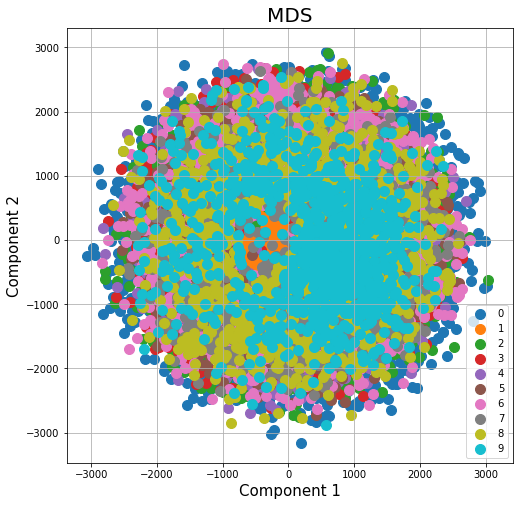

In [10]:
draw('MDS', mnist_embedded_mds)

In [11]:
mds_knn_3 = knn(3, X, mnist_embedded_mds.values)
mds_nn_3 = nn(mnist_embedded_mds.values, y, 3)
print('MNIST MDS knn_3: {}'.format(mds_knn_3))
print('MNIST MDS data nn_3: {}'.format(mds_nn_3))

MNIST MDS knn_3: 0.00185
MNIST MDS data nn_3: 0.2138666666666622


In [12]:
#LLE
mnist_embedded_lle = LocallyLinearEmbedding(n_components=2, max_iter=50).fit_transform(X)
mnist_embedded_lle = np.column_stack((mnist_embedded_lle, y))
mnist_embedded_lle = pd.DataFrame(data=mnist_embedded_lle, columns=['component 1', 'component 2', 'target'])

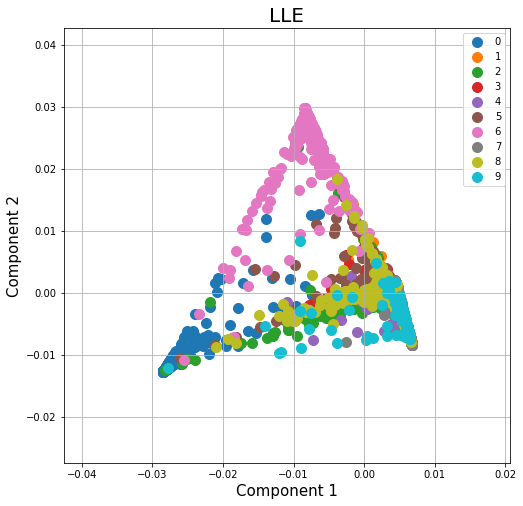

In [15]:
draw('LLE', mnist_embedded_lle)

In [14]:
lle_knn_3 = knn(3, X, mnist_embedded_lle.values)
lle_nn_3 = nn(mnist_embedded_lle.values, y, 3)
print('MNIST LLE knn_3: {}'.format(lle_knn_3))
print('MNIST LLE data nn_3: {}'.format(lle_nn_3))

MNIST LLE knn_3: 0.0317
MNIST LLE data nn_3: 1.0


In [16]:
#Isomap
mnist_embedded_iso = Isomap(n_components=2).fit_transform(X)
mnist_embedded_iso = np.column_stack((mnist_embedded_iso, y))
mnist_embedded_iso = pd.DataFrame(data=mnist_embedded_iso, columns=['component 1', 'component 2', 'target'])

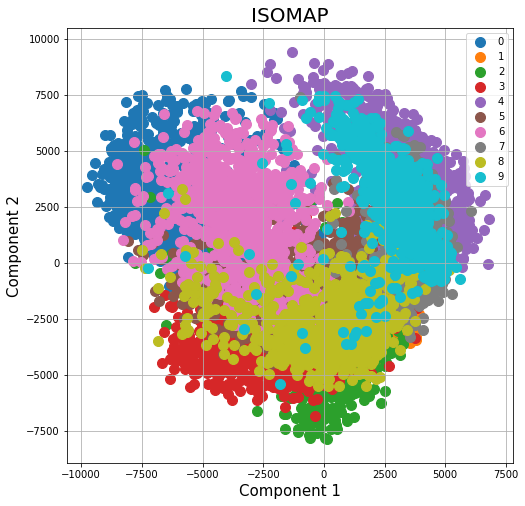

In [17]:
draw('ISOMAP', mnist_embedded_iso)

In [18]:
iso_knn_3 = knn(3, X, mnist_embedded_iso.values)
iso_nn_3 = nn(mnist_embedded_iso.values, y, 3)
print('MNIST MDS knn_3: {}'.format(iso_knn_3))
print('MNIST MDS data nn_3: {}'.format(iso_nn_3))

MNIST MDS knn_3: 0.00965
MNIST MDS data nn_3: 0.49436666666666595


# Porównanie metod

![](comparison.png)

# Zadania dla studentów do zrobienia na zajęciach

## Zadanie 1.   
Przy użyciu poniższego podzbioru(łatwy) przeprowadź steming, usuń stop words, a następnie wypróbuj techniki BoW oraz tf_idf, po przeprowadzeniu tf_idf użyj zwektoryzowanych danych do wizualizacji przy użyciu t-SNE, pamiętaj że domyślnie tf_idf nie używa stemingu, jednak bardzo łatwo możesz usunąć stop words. Jeżeli jednak jeteś ambitny pamiętaj o linku u góry tutoriala pozwoli Ci on na przeprowadzenie stemingu przy użyciu vectorizera tf_idf

przygtujmy zbiór danych

In [3]:
categories =  ['rec.autos', 'rec.motorcycles']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)

przeprowadź steming, jak zmieniły się dane?

In [5]:
stop_words = set(stopwords.words('english'))

def prepare(words):
    words = [ps.stem(w) for w in words if not w in stop_words]
    return set(words)

data = newsgroups_train.data
filtered = [prepare(s) for s in data]
as_string = [" ".join(s) for s in filtered]

NameError: name 'ps' is not defined

zmień dane na wektory przy użyciu BoW

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
print( vectorizer.fit_transform(as_string).todense() )
print( vectorizer.vocabulary_ )

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
{'from': 8790, 'subject': 17976, '18': 658, 'seen': 16863, 'vnew': 19960, 'vax': 19745, 'vm': 19948, 'line': 11877, 'philippian': 14675, '41': 1609, 'news': 13510, 'softwar': 17423, 'organ': 14063, 'heard': 9673, 'god': 9185, 'ye': 20674, 'those': 18657, 'promis': 15320, 'nntp': 13632, 'posting': 15047, 'host': 9989, 'univers': 19417, 'peac': 14503, 'receiv': 15843, 'weiss': 20185, '93': 2401, 'robert': 16296, 'ubvmsd': 19181, 'cc': 5245, 'buffalo': 4814, 'edu': 7587, 'apr': 3602, 'shall': 17000, 'thing': 18626, 'learn': 11701, 'psyrobtw': 15430, 'unabl': 19266, '30': 1391, 'the': 18553, 'address': 3012, 'pleas': 14854, 'raytrac': 15759, 'etc': 7975, 'if': 10212, 'manipul': 12311, 'greet': 9337, 'ridculli': 16213, 'archiv': 3648, 'bitmap': 4434, 'copi': 6128, 'pascal': 14405, 'inlin': 10554, '61': 1878, '51': 1750, '226536': 1170, 'current': 6454, 'post': 15037, 'mani

te same dane co w powyższym podpunkcie zamienń na wektory przy użyciu tf_idf

In [39]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(as_string)
print(X)
print(vectorizer.get_feature_names())

  (0, 8790)	0.04030449163008896
  (0, 17976)	0.04030449163008896
  (0, 658)	0.15635471222337727
  (0, 16863)	0.14513476074931586
  (0, 19960)	0.20215482675001545
  (0, 19745)	0.1950656428557199
  (0, 19948)	0.1774439626541951
  (0, 11877)	0.04030449163008896
  (0, 14675)	0.2891917416033874
  (0, 1609)	0.1726967772794159
  (0, 13510)	0.13886802078417995
  (0, 17423)	0.13886802078417995
  (0, 14063)	0.04195911924698635
  (0, 9673)	0.15787581695667874
  (0, 9185)	0.09974127004290946
  (0, 20674)	0.13344582153498172
  (0, 18657)	0.19254579165105556
  (0, 15320)	0.1726967772794159
  (0, 13632)	0.07355154278696262
  (0, 15047)	0.07348782025727775
  (0, 9989)	0.07291880621868108
  (0, 19417)	0.07652861690435321
  (0, 14503)	0.1847923403139818
  (0, 15843)	0.1847923403139818
  (0, 20185)	0.200633722016714
  :	:
  (1440, 11925)	0.09512426581344346
  (1440, 19980)	0.09358063727396948
  (1440, 12371)	0.07451948053472787
  (1440, 12826)	0.103037459006879
  (1440, 1591)	0.11714681897708208
  (1440,

użyj t-sne do wizualizacji danych, które zwektoryzowałeś przy użciu tf_idf, użyj różnych parametrów

In [43]:
X_embedded = TSNE(n_components=2, verbose=2).fit_transform(X.todense())

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1441 samples in 1.094s...
[t-SNE] Computed neighbors for 1441 samples in 78.889s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1441
[t-SNE] Computed conditional probabilities for sample 1441 / 1441
[t-SNE] Mean sigma: 0.312150
[t-SNE] Computed conditional probabilities in 0.096s
[t-SNE] Iteration 50: error = 75.2965546, gradient norm = 0.1442415 (50 iterations in 1.036s)
[t-SNE] Iteration 100: error = 75.5664215, gradient norm = 0.1222443 (50 iterations in 1.509s)
[t-SNE] Iteration 150: error = 74.8580627, gradient norm = 0.1371427 (50 iterations in 1.339s)
[t-SNE] Iteration 200: error = 75.1517868, gradient norm = 0.1451771 (50 iterations in 0.909s)
[t-SNE] Iteration 250: error = 74.9123535, gradient norm = 0.1501761 (50 iterations in 1.062s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.912354
[t-SNE] Iteration 300: error = 1.9049217, gradient norm = 0.0015775 (50 iterations in 0.673s

oblicz nn i knn

KeyError: 'target'

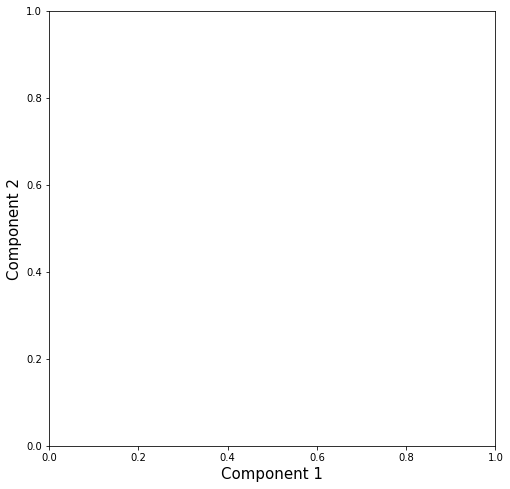

In [46]:
embedded = pd.DataFrame(data=X_embedded)
draw('', embedded)

## Zadanie 2.
przy użyciu cięższego podzbioru przeprowadź podobne operacje co w zadaniu 1

wiesz co robić więc do dzieła!

In [9]:
categories =  ['rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)

# zadania dla studentów do zrobienia w domu

Należy rozrzedzić zbiór danych 20-news-group(wybieramy niektóre grupy tak jak na początku tutorialu, co najmniej 5 grup, ale tez takie  co troche zachodza - na tym tokenizacja, stope wordsy, stemming), 
    PCA do 30 wymiarow
    i na tym bh-sne i jakies dwie inne - z tego tabelka - te 2 metryki (???)
    sprawdzic jak dziala perplexity i pobawic sie tym
    

chcemy mieć nie za duży słownik około 30 wymiarów. Należy użyć bh-sne, porównać z wcześniej wykorzystanymi metodami (tabelka!) oraz przetestować i opisać słownie jaki jest wpływ parametróww na wyniki.